# Back -Orders

A backorder is a retailer's request to a supplier or wholesaler for additional stock of a sold-out item to satisfy an outstanding customer order. 

In [1]:
import pandas as pd   #data processing
import numpy as np    #linear algebra
import matplotlib.pyplot as plt   #data visualization
%matplotlib inline
import seaborn as sns

In [4]:
back=pd.read_csv('D:\\datas\\block-masters\\BackOrders.csv')  #reading the csv dataset

In [8]:
back.shape #checking the shape of the dataset

(61589, 23)

In [12]:
pd.set_option('display.max_columns',25)   # setting the maximum column to display
back.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,15,1,No,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,0,0,No,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,365,47,No,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,9,1,No,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,6,0,No,0,0.97,0.92,0,No,No,No,Yes,No,No


In [15]:
back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 23 columns):
sku                  61589 non-null int64
national_inv         61589 non-null int64
lead_time            58186 non-null float64
in_transit_qty       61589 non-null int64
forecast_3_month     61589 non-null int64
forecast_6_month     61589 non-null int64
forecast_9_month     61589 non-null int64
sales_1_month        61589 non-null int64
sales_3_month        61589 non-null int64
sales_6_month        61589 non-null int64
sales_9_month        61589 non-null int64
min_bank             61589 non-null int64
potential_issue      61589 non-null object
pieces_past_due      61589 non-null int64
perf_6_month_avg     61589 non-null float64
perf_12_month_avg    61589 non-null float64
local_bo_qty         61589 non-null int64
deck_risk            61589 non-null object
oe_constraint        61589 non-null object
ppap_risk            61589 non-null object
stop_auto_buy        61589 non-null objec

In [14]:
back.describe().T   #feature description

,count,mean,std,min,25%,50%,75%,max
sku,61589.0,2.037188e+06,656417.815448,1068628.0,1498574.00,1898033.00,2314826.00,3284895.0
national_inv,61589.0,2.877219e+02,4233.906931,-2999.0,3.00,10.00,57.00,673445.0
lead_time,58186.0,7.559619e+00,6.498952,0.0,4.00,8.00,8.00,52.0
in_transit_qty,61589.0,3.019284e+01,792.869253,0.0,0.00,0.00,0.00,170976.0
forecast_3_month,61589.0,1.692728e+02,5286.742232,0.0,0.00,0.00,12.00,1126656.0
forecast_6_month,61589.0,3.150413e+02,9774.362076,0.0,0.00,0.00,25.00,2094336.0
forecast_9_month,61589.0,4.535760e+02,14202.007981,0.0,0.00,0.00,36.00,3062016.0
sales_1_month,61589.0,4.474296e+01,1373.805831,0.0,0.00,0.00,6.00,295197.0
sales_3_month,61589.0,1.507326e+02,5224.959649,0.0,0.00,2.00,17.00,934593.0
sales_6_month,61589.0,2.835465e+02,8872.269640,0.0,0.00,4.00,34.00,1799099.0


We can see some features having out liers. lets go for a detailed analysis for the outliers. lets first check for null values if any 

#### Missing values

In [16]:
back.isnull().sum()

sku                     0
national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

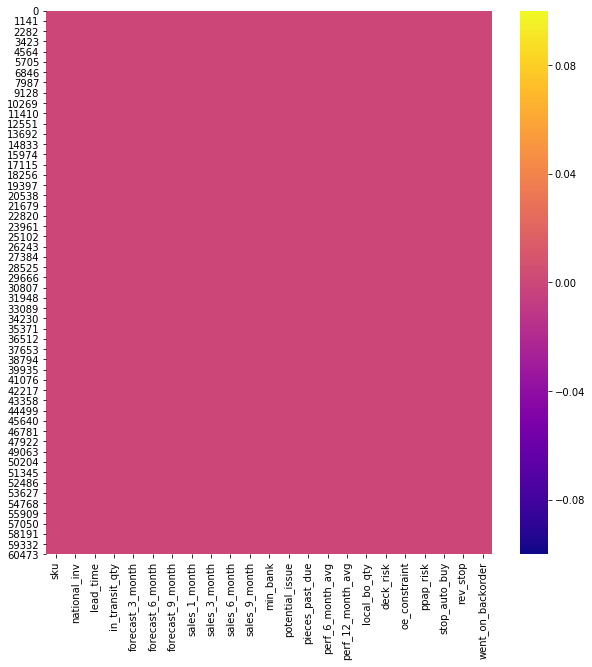

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(back.isnull(), xticklabels=back.columns, cmap='plasma')
plt.show()

We notics that only lead_time variable has missing values, lets look into it deeper

In [21]:
print (' total no. of missing values in lead_time variable:', back['lead_time'].isnull().sum() )
percent=round((back['lead_time'].isnull().sum()/back['lead_time'].isnull().count())*100,2)
print (' % of missing values in the in lead_time :', percent,'%')

 total no. of missing values in lead_time variable: 3403
 % of missing values in the in lead_time : 5.53 %


In [22]:
back['lead_time']=back['lead_time'].fillna(back['lead_time'].mean())  # fill the nan values with mean of the column

##### Out Lier Analysis